## Chapter 3 - Regression Models

### Segment 1 - Simple Linear Regression


In [366]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from pylab import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale



In [367]:
%matplotlib inline
rcParams['figure.figsize'] = 6,5

In [368]:
rooms = 2 * np.random.rand(100,1) + 3
rooms[:10]


array([[4.7991576 ],
       [4.07773193],
       [3.83032666],
       [4.05517551],
       [4.40006323],
       [4.78607236],
       [3.12925134],
       [3.01300507],
       [4.53133001],
       [4.94870303]])

In [369]:
price = 265 + 6 * rooms + abs(np.random.randn(100,1))
price[:10]

array([[294.80030699],
       [290.95599506],
       [288.34505822],
       [290.08965497],
       [292.77422655],
       [294.68849088],
       [285.76404465],
       [283.39785945],
       [293.35704022],
       [294.83880358]])

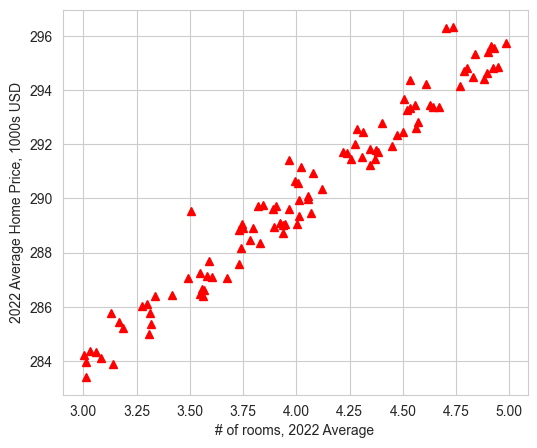

In [370]:
plt.plot(rooms, price, 'r^')
plt.xlabel("# of rooms, 2022 Average")
plt.ylabel("2022 Average Home Price, 1000s USD")
plt.show()


In [371]:
X = rooms
y = price
linreg = LinearRegression()
linreg.fit(X, y)
print(linreg.intercept_, linreg.coef_)

[266.02431863] [[5.97834236]]


**Print the R-squared number**

In [372]:
print(linreg.score(X,y))


0.9597149890023011


### Segment 2 - Multiple Linear Regression

In [373]:
import seaborn as sb
df = pd.read_csv('enrollment_forecast.csv')
df.head()

,year,roll,unem,hgrad,inc
0,1,5501,8.1,9552,1923
1,2,5945,7.0,9680,1961
2,3,6629,7.3,9731,1979
3,4,7556,7.5,11666,2030
4,5,8716,7.0,14675,2112


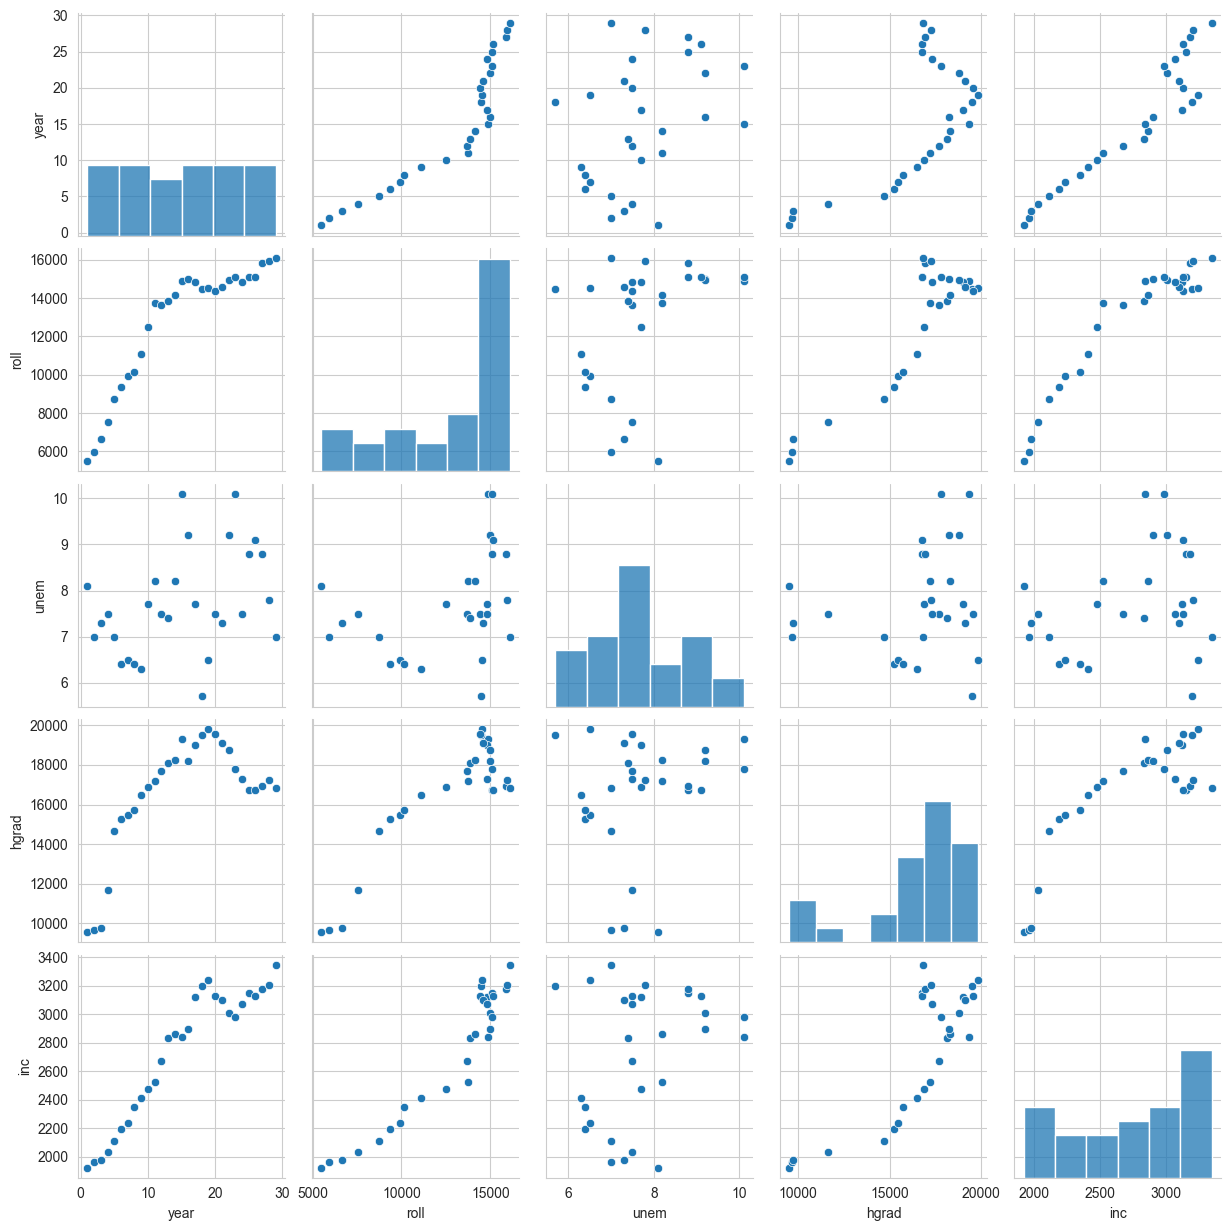

In [374]:
sb.pairplot(df)

In [375]:
df.corr()

,year,roll,unem,hgrad,inc
year,1.000000,0.900934,0.378305,0.670300,0.944287
roll,0.900934,1.000000,0.391344,0.890294,0.949876
unem,0.378305,0.391344,1.000000,0.177376,0.282310
hgrad,0.670300,0.890294,0.177376,1.000000,0.820089
inc,0.944287,0.949876,0.282310,0.820089,1.000000


**Lets isolate unem and hgrad**

In [376]:
subset = df[['unem', 'hgrad']].values
target = df[['roll']].values

In [377]:

enroll_data_names = ['unem', 'hgrad']
X, y = scale(subset), target


**Filter out missing values**

In [378]:
missing = X==np.NAN
np.any(missing)

False

In [379]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
linreg = make_pipeline(StandardScaler(with_mean=False),  LinearRegression())
linreg.fit(X, y )
print(linreg.score(X, y))

0.8488812666133723


### Segment 3 - Logistic Regression

In [380]:
sb.set_style('whitegrid')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [381]:
titanic_data = pd.read_csv('titanic-training-data.csv')
titanic_data.head()
print(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


**Check the target variable is actually binary**

<AxesSubplot: xlabel='Survived', ylabel='count'>

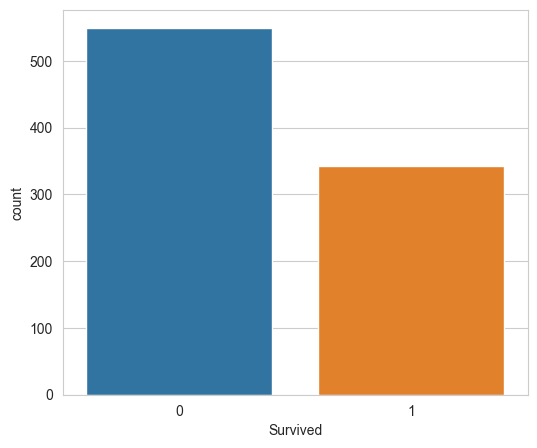

In [382]:
sb.countplot(x='Survived', data=titanic_data)

**Check for missing values**

In [383]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [384]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Drop irrelevant columns**

In [406]:
filtered_titanic_data = titanic_data.drop(['Name', 'Ticket', 'Cabin'], axis=1)
filtered_titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


**Age has missing values, lets impute those**

<AxesSubplot: xlabel='Parch', ylabel='Age'>

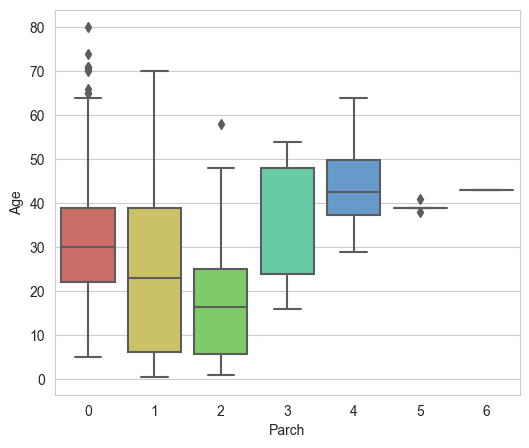

In [407]:
sb.boxplot(x='Parch', y='Age', data=filtered_titanic_data, palette='hls')

In [408]:
parch_groups = filtered_titanic_data.groupby(filtered_titanic_data['Parch'])
parch_groups.mean(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Fare
Parch,,,,,,
0,445.255162,0.343658,2.321534,32.178503,0.237463,25.586774
1,465.110169,0.550847,2.203390,24.422000,1.084746,46.778180
2,416.662500,0.500000,2.275000,17.216912,2.062500,64.337604
3,579.200000,0.600000,2.600000,33.200000,1.000000,25.951660
4,384.000000,0.000000,2.500000,44.500000,0.750000,84.968750
5,435.200000,0.200000,3.000000,39.200000,0.600000,32.550000
6,679.000000,0.000000,3.000000,43.000000,1.000000,46.900000


In [409]:
parch_age_table = parch_groups.mean(numeric_only=True).Age.transform(int)
parch_age_table

Parch
0    32
1    24
2    17
3    33
4    44
5    39
6    43
Name: Age, dtype: int64

In [410]:
def approx_age(cols):
    age = cols[0]
    parch = cols[1]
    if pd.isnull(age):
        return parch_age_table[parch]
    else: return age

In [411]:
filtered_titanic_data['Age'] = filtered_titanic_data[['Age', 'Parch']].apply(approx_age, axis=1) 

In [412]:
filtered_titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [413]:
filtered_titanic_data.isnull().sum(numeric_only=True)

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

**We can drop the 2 null values without affecting the results**

In [414]:
filtered_titanic_data.dropna(inplace=True)

In [415]:
filtered_titanic_data.reset_index(inplace=True, drop=True )
filtered_titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.6+ KB


**Converting categorical variables to dummy indicators**

In [416]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
gender = filtered_titanic_data['Sex']
print(f"Original: {gender[:5].values}")
gender_encoded = label_encoder.fit_transform(gender)
print(f"Encoded : {gender_encoded[:5]}")

Original: ['male' 'female' 'female' 'female' 'male']
Encoded : [1 0 0 0 1]


In [417]:
gender_df = pd.DataFrame(gender_encoded, columns=['Male'])
gender_df.head()

,Male
0,1
1,0
2,0
3,0
4,1


**The Embarked column has 3 disctinct values, lets encode to 3 separate binary columns**

In [418]:
embarked_cat = filtered_titanic_data['Embarked']
embarked_encoded = label_encoder.fit_transform(embarked_cat)
embarked_encoded[:55]

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0])

In [419]:
from sklearn.preprocessing import OneHotEncoder
binary_encoder = OneHotEncoder(categories='auto')
embarked_1hot = binary_encoder.fit_transform(embarked_encoded.reshape(-1, 1))
embarked_1hot_matrix = embarked_1hot.toarray()
embarked_df = pd.DataFrame(embarked_1hot_matrix, columns=['C', 'Q', 'S'])
embarked_df.head()

,C,Q,S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [420]:
filtered_titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [421]:
filtered_titanic_data.drop(['Sex', 'Embarked'], axis=1, inplace=True)
filtered_titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [428]:
temp_titanic = pd.concat([filtered_titanic_data, gender_df, embarked_df], axis=1, verify_integrity=True).astype(float)
temp_titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Male,C,Q,S
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,1.0,0.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,0.0,1.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,1.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,0.0,1.0


**Lets check for independence between features**

<AxesSubplot: >

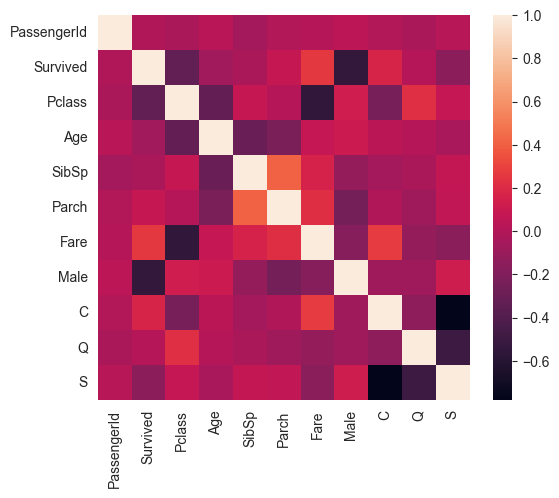

In [429]:
sb.heatmap(temp_titanic.corr())

In [430]:
temp_titanic.drop(['Fare','Pclass'], axis=1, inplace=True)
temp_titanic.head()

,PassengerId,Survived,Age,SibSp,Parch,Male,C,Q,S
0,1.0,0.0,22.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2.0,1.0,38.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3.0,1.0,26.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.0,1.0,35.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5.0,0.0,35.0,0.0,0.0,1.0,0.0,0.0,1.0


In [436]:
X_train, X_test, y_train, y_test = train_test_split(temp_titanic.drop(['Survived'], axis=1), temp_titanic['Survived'], test_size=0.2, random_state=200)
print(X_train.shape, y_train.shape)


(711, 8) (711,)


In [437]:
X_train.head()

,PassengerId,Age,SibSp,Parch,Male,C,Q,S
719,721.0,6.0,0.0,1.0,0.0,0.0,0.0,1.0
165,167.0,24.0,0.0,1.0,0.0,0.0,0.0,1.0
879,882.0,33.0,0.0,0.0,1.0,0.0,0.0,1.0
451,453.0,30.0,0.0,0.0,1.0,1.0,0.0,0.0
181,183.0,9.0,4.0,2.0,1.0,0.0,0.0,1.0


**Deploying and evaluating the model**

In [438]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)



LogisticRegression(solver='liblinear')

In [440]:
y_pred = logreg.predict(X_test)

### Model Evaluation
**Classification report without cross-validation**

In [442]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       109
         1.0       0.79      0.71      0.75        69

    accuracy                           0.81       178
   macro avg       0.81      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178



**K-fold cross-validation & confusion matrices**

In [444]:
y_train_pred = cross_val_predict(logreg, X_train, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)

array([[377,  63],
       [ 91, 180]], dtype=int64)

In [446]:
precision_score(y_train, y_train_pred)

0.7407407407407407

**Make a prediction using the model**

In [456]:
test_passenger = np.array([866, 40, 0, 0, 0, 0, 0, 1]).reshape(1,-1)
test_passenger

array([[866,  40,   0,   0,   0,   0,   0,   1]])

In [457]:
print(logreg.predict(test_passenger))
print(logreg.predict_proba(test_passenger))

[1.]
[[0.26351831 0.73648169]]


c:\Users\regulate\src\pyML\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\regulate\src\pyML\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
